In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(None, None, 3)))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(5))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 128)   3584      
_________________________________________________________________
dense (Dense)                (None, None, None, 8)     1032      
_________________________________________________________________
dense_1 (Dense)              (None, None, None, 5)     45        
Total params: 4,661
Trainable params: 4,661
Non-trainable params: 0
_________________________________________________________________


In [7]:
modell = tf.keras.models.Model(model.inputs, model.outputs)

In [11]:
modell.input_shape, model.input_shape

((None, None, None, 3), (None, None, None, 3))

In [13]:
model.layers, modell.layers

([<tensorflow.python.keras.layers.convolutional.Conv2D at 0x10940e6d8>,
  <tensorflow.python.keras.layers.core.Dense at 0x11bd14400>])

In [16]:
z=tf.keras.layers.Input((None, None, 3))

In [21]:
model(z), modell(z)

(<tf.Tensor 'sequential_2/dense_1/BiasAdd:0' shape=(?, ?, ?, 5) dtype=float32>,
 <tf.Tensor 'model_1_1/dense_1/BiasAdd:0' shape=(?, ?, ?, 5) dtype=float32>)

In [20]:
model = tf.keras.models.load_model('dcgan/checkpoints/G_step_2700.h5')

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_input (InputLayer)   (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12544)             1254400   
_________________________________________________________________
batch_normalization_3 (Batch (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 128)         512       
__________

In [22]:
import numpy as np

In [23]:
z = np.random.normal(0, 1, size=[16, 100])
gen_images = model.predict(z)

In [24]:
gen_images.shape

(16, 28, 28, 3)

In [25]:
gen_images = gen_images*0.5 + 0.5

In [26]:
gen_images[0].shape

(28, 28, 3)

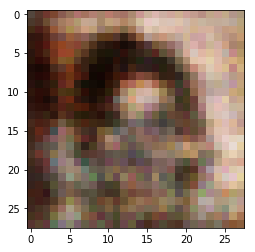

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(gen_images[0])

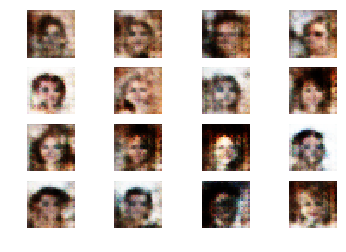

In [28]:
fig, axes = plt.subplots(4, 4)
for i, img in enumerate(gen_images):
    r, c = i//4, i%4
    axes[r, c].imshow(img)
    axes[r, c].axis('off')